In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly.graph_objects as go

In [3]:
df_fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)
df_life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)
df_pop = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)



df = {           'fert': df_fert,
                 'life': df_life,
                 'pop': df_pop,

    }

def check(data):
        '''
        Print main infomation about data frame
        '''
        print(data.shape)
        print(data.columns)
        print(data.describe())

for item in df:
        print(item)
        check(df[item])
        
        


fert
(260, 216)
Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)
             1800        1801        1802        1803        1804        1805  \
count  201.000000  201.000000  201.000000  201.000000  201.000000  201.000000   
mean     6.084080    6.081244    6.084328    6.083383    6.083682    6.083433   
std      0.777465    0.780857    0.775431    0.774806    0.774999    0.771939   
min      4.040000    4.040000    3.910000    4.050000    3.940000    4.060000   
25%      5.620000    5.620000    5.620000    5.620000    5.640000    5.620000   
50%      6.150000    6.150000    6.150000    6.150000    6.150000    6.150000   
75%      6.690000    6.690000    6.690000    6.690000    6.690000    6.690000   
max      8.100000    8.100000    8.100000    8.100000    8.100000    8.100000   

             1806   

In [4]:
label = {'fert': 'fertility_rate',
        'life': 'life_expectancy',
        'pop': 'population',
        'continent': 'continent'}

def change_index(data, label):
        '''
        Melting data to country and year
        '''
        print('Melting data: ', label)
        data.columns = data.columns.astype(int)
        data.index.name = 'country'
        data = data.reset_index()
        data = data.melt(id_vars='country', var_name='year', value_name=label)
        data = data.dropna()
        return data

In [5]:
for item in df:
        df[item] = change_index(df[item], item)

Melting data:  fert
Melting data:  life
Melting data:  pop


In [6]:
for item in df:
        check( df[item])

(43412, 3)
Index(['country', 'year', 'fert'], dtype='object')
               fert
count  43412.000000
mean       5.396902
std        1.612296
min        0.840000
25%        4.620000
50%        5.900000
75%        6.580000
max        9.220000
(43857, 3)
Index(['country', 'year', 'life'], dtype='object')
               life
count  43857.000000
mean      42.661683
std       16.424568
min        1.000000
25%       30.800000
50%       34.950000
75%       55.200000
max       84.800000
(20176, 3)
Index(['country', 'year', 'pop'], dtype='object')
                pop
count  2.017600e+04
mean   1.802123e+07
std    8.122935e+07
min    5.000000e+01
25%    1.371455e+05
50%    2.278861e+06
75%    9.509010e+06
max    1.376049e+09


In [7]:
df_full = df['fert'].merge(df['pop'])

In [8]:
df_full = df_full.merge(df['life'])

In [9]:
df_continent = pd.read_csv('../data/continents.csv', index_col=0, sep=';') 
df_continent.index.name = 'continent'
df_continent = df_continent.reset_index()
df_continent

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [10]:
df_full = df_full.merge(df_continent)

In [11]:
check(df_full)

(13446, 6)
Index(['country', 'year', 'fert', 'pop', 'life', 'continent'], dtype='object')
               fert           pop          life
count  13446.000000  1.344600e+04  13446.000000
mean       4.629932  2.313926e+07     57.132785
std        2.005239  9.694412e+07     15.917859
min        1.130000  2.128000e+03      4.000000
25%        2.610000  9.275418e+05     44.492500
50%        5.010000  4.074234e+06     60.475000
75%        6.460000  1.186560e+07     70.700000
max        9.220000  1.376049e+09     83.300000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt




In [13]:

df_cont = df_full.groupby('continent')[["fert", "life"]].agg(['min', 'max', 'mean'])


<Axes: xlabel='continent'>

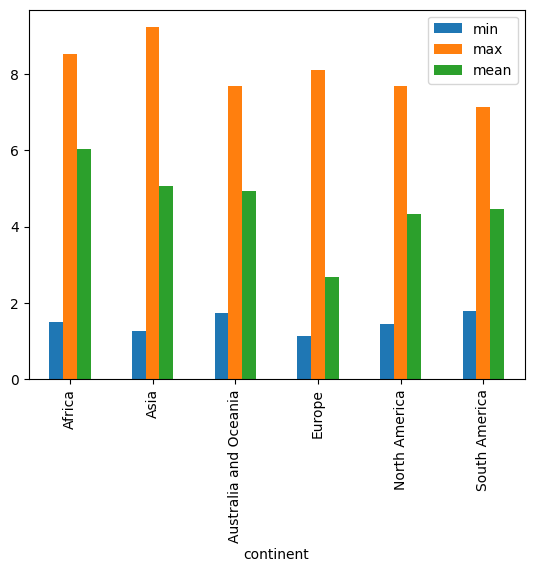

In [14]:
df_cont['fert'].plot.bar()

In [15]:
pip install imageio


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
for i in range(1970, 2016):
    plt.cla()
    plt.tight_layout()
    plt.figure(figsize=(16,9))
    plt.axes(xlabel='Life expectancy', ylabel='Fertility')
    df_subset = df_full.loc[df_full['year'] == i]
    sns.scatterplot(x='life', y='fert', style='continent', hue='continent', size='pop', legend='brief', sizes=(10, 3000),
                data=df_subset, alpha=0.6)
    plt.axis([30, 85, 0, 8])
    plt.savefig('img/life_fert_{}.jpg'.format(i))
    

In [21]:
import imageio

images = []

for i in range(1970, 2016):
    filename = 'img/life_fert_{}.jpg'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=2)



/tmp/ipykernel_19721/1814246439.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [23]:
df_full.to_csv("../data/df_full.csv")